# Part 1: Preprocessing

In [66]:
import string

text = ""

for filename in ['wiki.30.txt']: #['bible.txt', 'quran.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

In [67]:
# Calculate term frequency
term_freq = {}
for term in tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1

# Descending order
term_freq_desc = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)

rank = []
freq = []
for i in term_freq_desc:
    rank.append(i[0])
    freq.append(i[1])

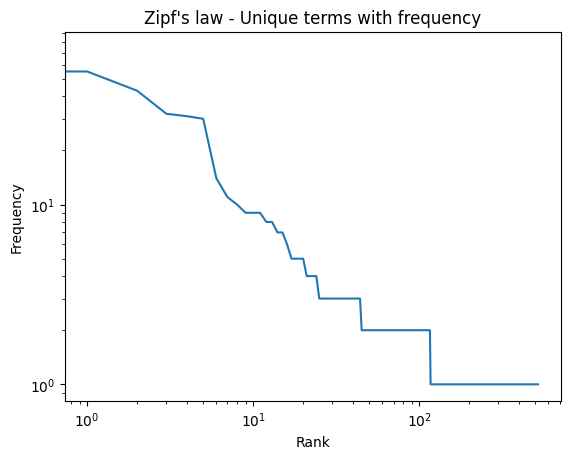

In [68]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - Unique terms with frequency")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

In [ ]:
# text_example = ["I", "am", "am", "stupid"]

# Heap frequency
terms = []
counter = []
count = 0

for word in tokens:
    if word in terms:
        terms.append(word)
        counter.append(count)
    else:
        count = count + 1
        terms.append(word)
        counter.append(count)

In [73]:
terms = []
counter = {}
counter_list = []
count = 0
n = 0

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

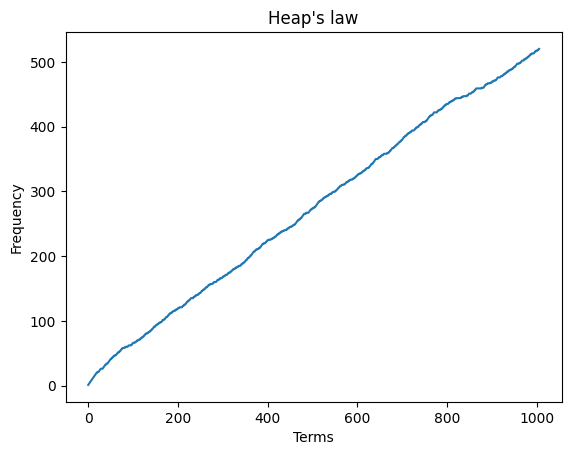

In [76]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

In [ ]:
text_example = ["I", "am", "stupid"]

# Calculate term frequency
heap = {}
count = 0
for word in text_example:
    # save new terms in a hash as you read the file. With each new term update the vocabulary size v.
    if word in heap:
        heap[word] = count

    # new word
    else:
        count = count + 1
        heap[word] = count

# Ascending order
term_freq_asce = sorted(heap.items(), key=lambda x: x[1], reverse=False)
term_freq_asce

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Stopping - Remove English stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for word in tokens:
    if word not in stop_words:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:200])

In [ ]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

Compare the processed file to the new file. Are there any surprises? Discuss
what kind of modifications in preprocessing could be applied. For example:
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

In [ ]:
example = "politician: politicians, politics policy"
tokensEx = tokenizer(example)
tokensEx

# Part 2: Text Laws

In [ ]:
import matplotlib.pyplot as plt

# Calculate term frequency
term_freq = {}
for term in stemmed_tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1